# Carbon Emission Prediction Using Machine Learing

Carbon emission is said to be one of the most critical reasons of global warming. This project aims to provide a country-wise overview of the future trends of carbon emission as well as a global trend prediction for next ten years. The approach is to analyse the historical data for these countries various economic factors, learn them, and make future predictions.

Dataset:
https://www.kaggle.com/manchunhui/world-co2-emissions-analysis/

# Summary

The most challening part of the data science or machine learning is cleaning and processing the dataset to build the model. This notebook file contains all the steps of cleaning the dataset and preparing it to feed onto the model. In the end of the notebook a clean dataset will be exported for further processing.

# Data cleaning

## Import libraries and read dataset

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [4]:
# Read dataset from Dataset directory and convert into a pandas dataframe 
df = pd.read_csv("../dataset/original/WDIData_T.csv");

In [5]:
# View first five rows of the dataframe
df.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,134.772341
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,88.061110
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.591951
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,81.324186
4,Arab World,ARB,Aquaculture production (metric tons),ER.FSH.AQUA.MT,1960,4600.000000


In [7]:
# View last five columns of the dataframe
df.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
7578801,Zimbabwe,ZWE,"Vulnerable employment, male (% of male employm...",SL.EMP.VULN.MA.ZS,2020,54.420999
7578802,Zimbabwe,ZWE,"Vulnerable employment, total (% of total emplo...",SL.EMP.VULN.ZS,2020,64.588001
7578803,Zimbabwe,ZWE,"Wage and salaried workers, female (% of female...",SL.EMP.WORK.FE.ZS,2020,25.169001
7578804,Zimbabwe,ZWE,"Wage and salaried workers, male (% of male emp...",SL.EMP.WORK.MA.ZS,2020,44.932999
7578805,Zimbabwe,ZWE,"Wage and salaried workers, total (% of total e...",SL.EMP.WORK.ZS,2020,34.938000


In [9]:
# View dataframe shape - It returns total rows and columns count
df.shape

(7578806, 6)

In [18]:
# View few important information about the dataset
# Check unique countries
unique_countries = df["CountryName"].unique()
print("Unique countries count:", len(unique_countries))
# Get unique indicators
unique_indicators = df["IndicatorName"].unique()
print("Unique indicators count:", len(unique_indicators))
# Get unique years count
years = df["Year"].unique()
print("Years of data:", len(years))

Unique countries count: 263
Unique indicators count: 1437
Years of data: 61


## Factors selection

There are several factors responsible for increasing the amount of carbon emissions around the world. In this dataset there are 1437 unique indicators available which are provided by World Bank. These indicators are related to the economy of a particular country, and not necessarily related to carbon emission only. Consequently, that leaves to a situation where selecting the ideal indicators for processing becomes very crucial.

Initially a theoritical analysis has been followed to choose the indicators most likely to impact amount of carbon emissions. 

In [19]:
# List choosen indicators
indicators = [
 'Alternative and nuclear energy (% of total energy use)',
 'Air transport, freight (million ton-km)',
 'Combustible renewables and waste (% of total energy)',
 'Cereal yield (kg per hectare)',
 'CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'Electricity production from coal sources (% of total)',
 'Electricity production from hydroelectric sources (% of total)',
 'Electricity production from natural gas sources (% of total)',
 'Electricity production from nuclear sources (% of total)',
 'Electricity production from oil sources (% of total)',
 'Electricity production from renewable sources, excluding hydroelectric (% of total)',
 'Energy use (kg of oil equivalent per capita)',
 'Fossil fuel energy consumption (% of total)',
 'Fuel imports (% of merchandise imports)',
 'GDP growth (annual %)',
 'GDP per capita (current US$)',
 'Population growth (annual %)',
 'Population in urban agglomerations of more than 1 million (% of total population)',
 'Urban population (% of total population)',
 'Urban population growth (annual %)', 
 'Methane emissions (kt of CO2 equivalent)',
 'Nitrous oxide emissions (thousand metric tons of CO2 equivalent)',
]

# Declare and list indicator codes for the choosen indicators to shorten the length that helps
# processing the data
indicator_codes = [
'ALT_NUCL_EN_PERC',
'AIR_TRANS_FREIGHT',
'COMB_REN_WASTE_PERC',
'CEREAL_YIELD',
'CO2_EM_TOTAL',
'CO2_EM_PC',
'ELEC_PROD_COAL_PERC',
'ELEC_PROD_HYDRO_PERC',
'ELEC_PROD_NAT_GAS_PERC',
'ELEC_PROD_NUCL_PERC',
'ELEC_PROD_OIL_PERC',
'ELEC_PROD_RENW_SRC_PERC',
'EN_USE_PC',
'FOSSIL_FUEL_EN_CONS_PERC',
'FUEL_IMPORT_PERC',
'GDP_GROWTH_PERC',
'GDP_PC',
'POP_GROWTH_PERC',
'POP_URBAN_AGG',
'URBAN_POP_TOTAL',
'URBAN_POP_GROWTH',
'METHANE_EM',
'NO2_EM',
]

In [30]:
# Filter the dataframe with selected indicators
data = df[df['IndicatorName'].isin(indicators)]
# View the filtered dataframe
data

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,56005.299798
12,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.607448
124,Arab World,ARB,Population in urban agglomerations of more tha...,EN.URB.MCTY.TL.ZS,1960,14.372858
136,Arab World,ARB,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1960,31.234143
146,Caribbean small states,CSS,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5878.201000
...,...,...,...,...,...,...
7564519,Zimbabwe,ZWE,GDP per capita (current US$),NY.GDP.PCAP.CD,2019,1463.985910
7564673,Zimbabwe,ZWE,Population growth (annual %),SP.POP.GROW,2019,1.419681
7564677,Zimbabwe,ZWE,Population in urban agglomerations of more tha...,EN.URB.MCTY.TL.ZS,2019,10.387589
7564779,Zimbabwe,ZWE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2019,32.210000


In [31]:
# Visualize value counts associated to the indicators
data['IndicatorName'].value_counts()

Urban population (% of total population)                                               15652
Population growth (annual %)                                                           15436
Urban population growth (annual %)                                                     15319
CO2 emissions (kt)                                                                     12988
CO2 emissions (metric tons per capita)                                                 12976
GDP per capita (current US$)                                                           12369
GDP growth (annual %)                                                                  11892
Cereal yield (kg per hectare)                                                          11781
Nitrous oxide emissions (thousand metric tons of CO2 equivalent)                       10757
Methane emissions (kt of CO2 equivalent)                                               10714
Population in urban agglomerations of more than 1 million (% of total 

In [32]:
# Drop IndicatorCode and CountryName Column
# These are not important for further processing
data = data.drop(['IndicatorCode', 'CountryName'], axis = 1)
data = data.reset_index(drop=True)
print("Dataframe after dopping these columns")
data.head()

Dataframe after dopping these columns


,CountryCode,IndicatorName,Year,Value
0,ARB,CO2 emissions (kt),1960,56005.299798
1,ARB,CO2 emissions (metric tons per capita),1960,0.607448
2,ARB,Population in urban agglomerations of more tha...,1960,14.372858
3,ARB,Urban population (% of total population),1960,31.234143
4,CSS,CO2 emissions (kt),1960,5878.201000


## Data transformation

In [33]:
# Convert indictators and indicator codes into a dictionary 
# Replace the IndicatorName with custom indicator
dictionary_indicators = dict(zip(indicators, indicator_codes))
data['IndicatorName'] = data['IndicatorName'].replace(to_replace=dictionary_indicators)
data

,CountryCode,IndicatorName,Year,Value
0,ARB,CO2_EM_TOTAL,1960,56005.299798
1,ARB,CO2_EM_PC,1960,0.607448
2,ARB,POP_URBAN_AGG,1960,14.372858
3,ARB,URBAN_POP_TOTAL,1960,31.234143
4,CSS,CO2_EM_TOTAL,1960,5878.201000
...,...,...,...,...
237243,ZWE,GDP_PC,2019,1463.985910
237244,ZWE,POP_GROWTH_PERC,2019,1.419681
237245,ZWE,POP_URBAN_AGG,2019,10.387589
237246,ZWE,URBAN_POP_TOTAL,2019,32.210000


To carry out further processing the indicators are required to columns and the associated values should be added according to the columns. 

In [115]:
# Transform the dataframe with pivot_table method
# Make indicators as columns with associated values from the Value column from the original dataframe
data_transformed = pd.pivot_table(data, values = 'Value', index=['CountryCode','Year'], columns = 'IndicatorName').reset_index()
data_transformed

IndicatorName,CountryCode,Year,AIR_TRANS_FREIGHT,ALT_NUCL_EN_PERC,CEREAL_YIELD,CO2_EM_PC,CO2_EM_TOTAL,COMB_REN_WASTE_PERC,ELEC_PROD_COAL_PERC,ELEC_PROD_HYDRO_PERC,...,FOSSIL_FUEL_EN_CONS_PERC,FUEL_IMPORT_PERC,GDP_GROWTH_PERC,GDP_PC,METHANE_EM,NO2_EM,POP_GROWTH_PERC,POP_URBAN_AGG,URBAN_POP_GROWTH,URBAN_POP_TOTAL
0,ABW,1960,NaN,NaN,NaN,204.620372,11092.675,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.776
1,ABW,1961,NaN,NaN,NaN,208.822811,11576.719,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.238144,NaN,2.209658,50.761
2,ABW,1962,NaN,NaN,NaN,226.118079,12713.489,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.409622,NaN,1.379868,50.746
3,ABW,1963,NaN,NaN,NaN,214.800370,12178.107,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.832453,NaN,0.799404,50.730
4,ABW,1964,NaN,NaN,NaN,207.615777,11840.743,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.592649,NaN,0.565140,50.715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15771,ZWE,2015,0.796107,NaN,558.2,0.891624,12317.453,NaN,46.781337,51.395612,...,NaN,26.159057,1.779873,1445.071062,NaN,NaN,1.663813,10.856050,1.297036,32.385
15772,ZWE,2016,0.804947,NaN,581.8,0.782777,10982.665,NaN,NaN,NaN,...,NaN,28.192379,0.755869,1464.583529,NaN,NaN,1.549759,10.725311,1.274558,32.296
15773,ZWE,2017,0.665035,NaN,616.0,NaN,NaN,NaN,NaN,NaN,...,NaN,30.137697,4.704035,1548.170056,NaN,NaN,1.460061,10.605662,1.277192,32.237
15774,ZWE,2018,0.665035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,29.844844,4.829674,1683.740577,NaN,NaN,1.410783,10.492514,1.323892,32.209


In [116]:
# Check null values
data_transformed.isnull().sum()

IndicatorName
CountryCode                    0
Year                           0
AIR_TRANS_FREIGHT           6980
ALT_NUCL_EN_PERC            7639
CEREAL_YIELD                3995
CO2_EM_PC                   2800
CO2_EM_TOTAL                2788
COMB_REN_WASTE_PERC         7639
ELEC_PROD_COAL_PERC         7756
ELEC_PROD_HYDRO_PERC        7756
ELEC_PROD_NAT_GAS_PERC      7756
ELEC_PROD_NUCL_PERC         7882
ELEC_PROD_OIL_PERC          7756
ELEC_PROD_RENW_SRC_PERC     7756
EN_USE_PC                   7889
FOSSIL_FUEL_EN_CONS_PERC    7689
FUEL_IMPORT_PERC            6837
GDP_GROWTH_PERC             3884
GDP_PC                      3407
METHANE_EM                  5062
NO2_EM                      5019
POP_GROWTH_PERC              340
POP_URBAN_AGG               6389
URBAN_POP_GROWTH             457
URBAN_POP_TOTAL              124
dtype: int64

## Data cleanup strategy

The transformed dataframe contains about 15 thousand rows of data. However, all the indicator columns have significant amount of missing values. Removing all the missing values will going to affect the model since the remaining data amount will be very small. 

Therefore, the missing data are handled in four steps. 
* Filtered by years with large number of missing data
* Filtered by countries with large number of missing data
* Remove outlires by analysing the seaborn plot
* Replacing missing value with mean

In [117]:
# Step 1
# Visualise missing value counts based on year
# Declare a variable with unique years
years_count = dict.fromkeys(data_transformed['Year'].unique(), 0)

# Loop through data frame and store null value counts
for ind, row in data_transformed.iterrows():
    years_count[row['Year']] += row.isnull().sum()

# Sort the dictionary in ascending order with respect to missing values count
years_count_sorted = dict(sorted(years_count.items(), key=lambda item: item[1]))

# Check missing values by year
print("Year : Missing values")
print("---------------------")
for key, val in years_count_sorted.items():
    print(key, ":", val)

Year : Missing values
---------------------
2007 : 1090
2005 : 1103
2006 : 1103
2004 : 1106
2010 : 1124
2012 : 1124
2011 : 1132
2009 : 1152
2008 : 1158
2003 : 1168
2001 : 1169
2000 : 1172
2002 : 1179
1999 : 1242
1998 : 1255
1997 : 1257
1996 : 1270
1995 : 1292
1994 : 1341
1993 : 1346
1992 : 1371
1990 : 1417
1991 : 1448
2013 : 1617
2014 : 1659
1989 : 1721
1988 : 1725
1985 : 1734
1987 : 1735
1986 : 1738
1984 : 1748
1983 : 1753
1981 : 1761
1982 : 1767
1980 : 1783
1978 : 1793
1979 : 1793
1977 : 1794
1976 : 1798
1975 : 1806
1974 : 1822
1973 : 1850
1972 : 1861
1971 : 1868
2015 : 2308
1970 : 3059
2016 : 3512
1969 : 3731
1968 : 3734
1967 : 3740
1966 : 3749
1965 : 3764
1964 : 3792
1963 : 3804
1962 : 3813
1961 : 3909
2017 : 4016
2018 : 4257
2019 : 4569
1960 : 4698


From the above output it is visible that the amount of missing values are significantly higher from 1960 to 1970 and 2016 to 2019. Thus, it was decided to drop those years of data and keep data from 1971 to 2014.
The data from 2015 are preserved to test the model by humans practially. 

In [118]:
# # Step 2
# Visualise missing value counts based on country
# Declare a variable with unique country code
countries_count = dict.fromkeys(data_transformed['CountryCode'].unique(), 0)

# Loop through data frame and store null value counts
for ind, row in data_transformed.iterrows():
    countries_count[row['CountryCode']] += row.isnull().sum()

# Sort the dictionary in ascending order with respect to missing values count
countries_count_sorted = dict(sorted(countries_count.items(), key=lambda item: item[1]))

# Check missing values by country
print("Country Code : Missing values")
print("---------------------")
for key, val in countries_count_sorted.items():
    print(key, ":", val)

Country Code : Missing values
---------------------
CAN : 99
ESP : 99
GBR : 99
GRC : 99
JPN : 99
NAC : 99
OED : 99
PRT : 99
PST : 99
TUR : 99
USA : 99
AUS : 101
AUT : 101
FIN : 101
ITA : 103
FRA : 104
NLD : 105
CHE : 109
IRL : 111
NZL : 112
SWE : 113
EUU : 115
NOR : 116
DNK : 122
BEL : 146
HIC : 159
EMU : 162
EAR : 179
DEU : 181
POL : 183
WLD : 183
IBD : 204
IBT : 204
LMY : 204
LTE : 204
MIC : 204
UMC : 204
CHL : 209
KOR : 209
MEX : 209
LAC : 210
LCN : 210
TLA : 210
BRA : 214
COL : 215
IND : 215
PAK : 215
PHL : 215
SAS : 215
THA : 215
TSA : 215
ARG : 216
BOL : 216
ECU : 216
ISL : 216
PER : 216
MYS : 217
PAN : 217
CRI : 218
HUN : 219
LMC : 220
MAR : 220
ISR : 221
SEN : 221
EGY : 222
PRY : 224
SLV : 226
TUN : 226
IDN : 227
NGA : 227
DZA : 228
GTM : 228
CMR : 229
TGO : 230
CIV : 233
URY : 233
ZAF : 233
ECS : 234
GHA : 234
VEN : 234
HND : 235
KEN : 235
NIC : 237
NPL : 237
BGD : 239
COG : 240
JOR : 240
CHN : 241
SAU : 242
SSF : 242
TSS : 242
SSA : 243
IRN : 247
IDA : 249
MEA : 251
ZMB : 252

In [124]:
# Filter data from year 1971 to 2014
data_filtered = data_transformed[(data_transformed['Year'] >= 1971) & (data_transformed['Year'] <= 2014)]
data_filtered = data_filtered.reset_index(drop=True)
data_filtered

IndicatorName,CountryCode,Year,AIR_TRANS_FREIGHT,ALT_NUCL_EN_PERC,CEREAL_YIELD,CO2_EM_PC,CO2_EM_TOTAL,COMB_REN_WASTE_PERC,ELEC_PROD_COAL_PERC,ELEC_PROD_HYDRO_PERC,...,FOSSIL_FUEL_EN_CONS_PERC,FUEL_IMPORT_PERC,GDP_GROWTH_PERC,GDP_PC,METHANE_EM,NO2_EM,POP_GROWTH_PERC,POP_URBAN_AGG,URBAN_POP_GROWTH,URBAN_POP_TOTAL
0,ABW,1971,NaN,NaN,NaN,243.870306,14495.651,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.4531,1.826948,0.636273,NaN,0.606851,50.609
1,ABW,1972,NaN,NaN,NaN,234.886547,14055.611,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.6570,1.844813,0.670693,NaN,0.639530,50.593
2,ABW,1973,NaN,NaN,NaN,258.819846,15592.084,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.8551,1.822090,0.671205,NaN,0.642030,50.578
3,ABW,1974,NaN,NaN,NaN,233.488931,14132.618,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.0415,1.821157,0.471968,NaN,0.442080,50.563
4,ABW,1975,NaN,NaN,NaN,168.729034,10234.597,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.2194,1.829608,0.212898,NaN,0.182809,50.548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11567,ZWE,2010,25.138924,4.483218,733.7,0.614549,7803.376,69.395060,31.713791,66.924409,...,24.855705,17.509430,19.675323,948.331854,8420.5000,4187.077000,1.353893,11.612767,0.807137,33.196
11568,ZWE,2011,44.684921,3.807726,587.7,0.746236,9622.208,65.524806,41.655816,56.434462,...,28.492743,15.669212,14.193913,1093.654002,8504.7050,4228.947770,1.536391,11.474506,0.989645,33.015
11569,ZWE,2012,47.288226,3.648776,696.4,0.600303,7873.049,63.683975,39.052483,58.567858,...,28.860873,21.765971,16.665429,1304.969802,8588.9100,4270.818540,1.698001,11.319635,1.148264,32.834
11570,ZWE,2013,32.681952,3.295843,669.3,0.881705,11771.070,62.557786,45.464995,52.204807,...,29.095759,22.452636,1.989493,1430.000818,NaN,NaN,1.777645,11.157860,1.227921,32.654


After filtering out the values based on years there are still quite a number of missing values. The above output represents the missing values based on country. The next step is to filter out the countries with more than 600 missing values. 

In [127]:
# Filter out countries with more than 600 missing values
countries_filter = []
for key, val in countries_count_sorted.items():
    if val < 600:
        countries_filter.append(key)

# Store filtered values
data_filtered = data_filtered[data_filtered['CountryCode'].isin(countries_filter)]

In [128]:
# Available data after filtering out countries
data_filtered.shape

(7172, 25)

In [129]:
# Missing value after filtering out countries
data_filtered.isnull().sum()

IndicatorName
CountryCode                    0
Year                           0
AIR_TRANS_FREIGHT            735
ALT_NUCL_EN_PERC             149
CEREAL_YIELD                 396
CO2_EM_PC                    107
CO2_EM_TOTAL                 104
COMB_REN_WASTE_PERC          149
ELEC_PROD_COAL_PERC          228
ELEC_PROD_HYDRO_PERC         228
ELEC_PROD_NAT_GAS_PERC       228
ELEC_PROD_NUCL_PERC          228
ELEC_PROD_OIL_PERC           228
ELEC_PROD_RENW_SRC_PERC      228
EN_USE_PC                    389
FOSSIL_FUEL_EN_CONS_PERC     296
FUEL_IMPORT_PERC            1663
GDP_GROWTH_PERC              630
GDP_PC                       574
METHANE_EM                   326
NO2_EM                       326
POP_GROWTH_PERC                5
POP_URBAN_AGG               1191
URBAN_POP_GROWTH               4
URBAN_POP_TOTAL                0
dtype: int64

After filtering out the dataframe with countries with missing values over 600 there are still a good number of missing values visible. Next, a seaborn plot has been generated to investigate the outlires. 

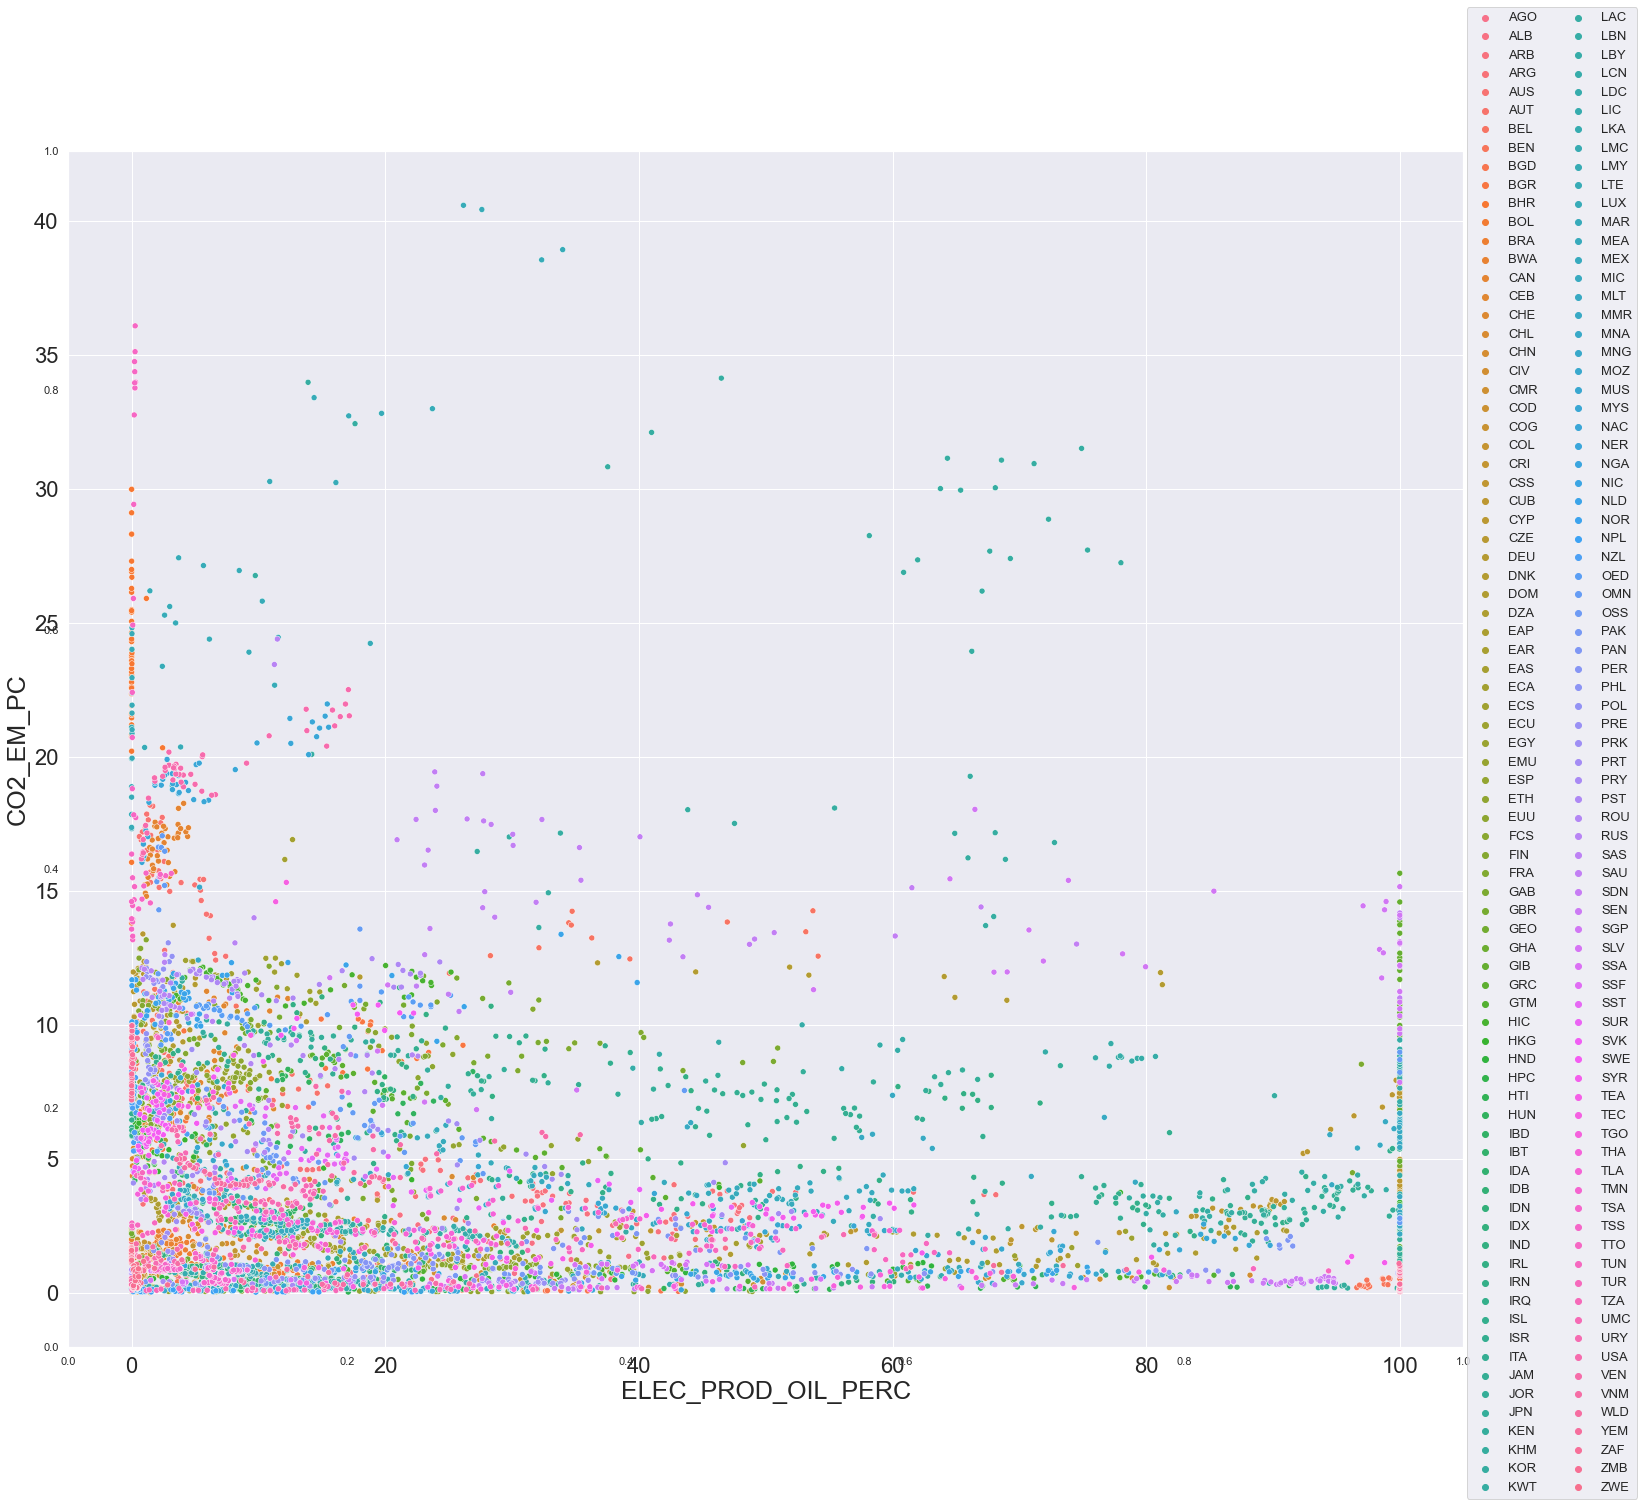

In [142]:
sns.set()

fig,ax=plt.subplots(figsize=(25,22))
#fig.subplots_adjust(hspace=0.1, wspace=0.1)
ind=1


# set color theme
sns.set_context("paper")
sns.set(color_codes=True, font_scale=2)

for [col, label] in  [['ELEC_PROD_OIL_PERC', 'ELEC_PROD_OIL_PERC']]:
      
    ax = fig.add_subplot(1,1,ind)
    sns.scatterplot(ax=ax, x=col, y="CO2_EM_PC", data=data_filtered, hue="CountryCode", legend='full')
    ax.legend_.remove()
    ax.set_xlabel(label, fontsize=25)
    ax.set_ylabel('CO2_EM_PC', fontsize=25)
    ind+=1

# create common legend
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, ncol=2, loc='center right', fontsize=13)
plt.show()

From the plot it can be noticed that ARE, BRB, and QAT have unrelated data with respect to other countries. Hence, those countries data has been dropped considering outlires.

In [143]:
# Remove the Arab Emirates, Brunei, Qatar outliers
data_filtered = data_filtered[(data_filtered['CountryCode']!='ARE') & (data_filtered['CountryCode']!='BRN') & (data_filtered['CountryCode']!='QAT')]
print("Shape of the dataset after removing the Arab Emirates, Brunei, Qatar outliers:")
data_filtered.shape

Shape of the dataset after removing the Arab Emirates, Brunei, Qatar outliers:


(7040, 25)

In [144]:
data_filtered.isnull().sum()

IndicatorName
CountryCode                    0
Year                           0
AIR_TRANS_FREIGHT            716
ALT_NUCL_EN_PERC             149
CEREAL_YIELD                 390
CO2_EM_PC                    107
CO2_EM_TOTAL                 104
COMB_REN_WASTE_PERC          149
ELEC_PROD_COAL_PERC          228
ELEC_PROD_HYDRO_PERC         228
ELEC_PROD_NAT_GAS_PERC       228
ELEC_PROD_NUCL_PERC          228
ELEC_PROD_OIL_PERC           228
ELEC_PROD_RENW_SRC_PERC      228
EN_USE_PC                    389
FOSSIL_FUEL_EN_CONS_PERC     260
FUEL_IMPORT_PERC            1627
GDP_GROWTH_PERC              591
GDP_PC                       570
METHANE_EM                   320
NO2_EM                       320
POP_GROWTH_PERC                5
POP_URBAN_AGG               1103
URBAN_POP_GROWTH               4
URBAN_POP_TOTAL                0
dtype: int64

There are still missing values visible on most of the indicators. Once solution to handle the missing values is to drop all missing values. But, it is not a feasible option here since dropping those data will affect the dataset size and hence put a negative impact on the model predictions. 

Therefore, a second option is considered which is replacing the missing value with mean or median value with a process called Data Imputation. However, before applying data imputation the CountryCode column has to be converted into numerical value as it is currently in text format. Data imputation does not work on non-numerical value. 

Country code column is a categorial data. There are several ways to handle categorical data. LabelEncoding is one of them which is applied here. 

In [145]:
# Store copy of filtered data in another variable
data_encoded = data_filtered.copy()
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'CountryCode'. 
data_encoded['CountryCode']= label_encoder.fit_transform(data_encoded['CountryCode']) 
data_encoded

IndicatorName,CountryCode,Year,AIR_TRANS_FREIGHT,ALT_NUCL_EN_PERC,CEREAL_YIELD,CO2_EM_PC,CO2_EM_TOTAL,COMB_REN_WASTE_PERC,ELEC_PROD_COAL_PERC,ELEC_PROD_HYDRO_PERC,...,FOSSIL_FUEL_EN_CONS_PERC,FUEL_IMPORT_PERC,GDP_GROWTH_PERC,GDP_PC,METHANE_EM,NO2_EM,POP_GROWTH_PERC,POP_URBAN_AGG,URBAN_POP_GROWTH,URBAN_POP_TOTAL
88,0,1971,NaN,1.351166,805.7,0.564548,3410.310,82.814638,0.000000,81.536388,...,15.834196,3.008041,NaN,NaN,14500.000,15844.22400,2.521468,8.088198,6.935496,15.632
89,0,1972,NaN,1.410646,780.3,0.721246,4506.743,77.328549,0.000000,81.145585,...,21.260806,4.912853,NaN,NaN,15590.000,16758.84800,3.381711,8.226706,8.512645,16.455
90,0,1973,NaN,1.694730,764.0,0.751240,4880.777,78.198305,0.000000,82.723577,...,20.106941,5.225642,NaN,NaN,16651.700,17638.93800,3.898493,8.323290,8.964003,17.310
91,0,1974,NaN,1.748593,712.6,0.720776,4873.443,77.325302,0.000000,69.812856,...,20.926104,4.493266,NaN,NaN,15008.300,14997.73800,3.989233,8.413978,9.013923,18.202
92,0,1975,NaN,1.982570,773.9,0.628569,4415.068,80.191191,0.000000,72.796935,...,17.826264,NaN,NaN,NaN,17061.400,17645.91300,3.810585,8.520843,8.772812,19.128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11567,159,2010,25.138924,4.483218,733.7,0.614549,7803.376,69.395060,31.713791,66.924409,...,24.855705,17.509430,19.675323,948.331854,8420.500,4187.07700,1.353893,11.612767,0.807137,33.196
11568,159,2011,44.684921,3.807726,587.7,0.746236,9622.208,65.524806,41.655816,56.434462,...,28.492743,15.669212,14.193913,1093.654002,8504.705,4228.94777,1.536391,11.474506,0.989645,33.015
11569,159,2012,47.288226,3.648776,696.4,0.600303,7873.049,63.683975,39.052483,58.567858,...,28.860873,21.765971,16.665429,1304.969802,8588.910,4270.81854,1.698001,11.319635,1.148264,32.834
11570,159,2013,32.681952,3.295843,669.3,0.881705,11771.070,62.557786,45.464995,52.204807,...,29.095759,22.452636,1.989493,1430.000818,NaN,NaN,1.777645,11.157860,1.227921,32.654


In [146]:
# Reset index aftter label encoding
data_encoded= data_encoded.reset_index(drop=True)
data_encoded

IndicatorName,CountryCode,Year,AIR_TRANS_FREIGHT,ALT_NUCL_EN_PERC,CEREAL_YIELD,CO2_EM_PC,CO2_EM_TOTAL,COMB_REN_WASTE_PERC,ELEC_PROD_COAL_PERC,ELEC_PROD_HYDRO_PERC,...,FOSSIL_FUEL_EN_CONS_PERC,FUEL_IMPORT_PERC,GDP_GROWTH_PERC,GDP_PC,METHANE_EM,NO2_EM,POP_GROWTH_PERC,POP_URBAN_AGG,URBAN_POP_GROWTH,URBAN_POP_TOTAL
0,0,1971,NaN,1.351166,805.7,0.564548,3410.310,82.814638,0.000000,81.536388,...,15.834196,3.008041,NaN,NaN,14500.000,15844.22400,2.521468,8.088198,6.935496,15.632
1,0,1972,NaN,1.410646,780.3,0.721246,4506.743,77.328549,0.000000,81.145585,...,21.260806,4.912853,NaN,NaN,15590.000,16758.84800,3.381711,8.226706,8.512645,16.455
2,0,1973,NaN,1.694730,764.0,0.751240,4880.777,78.198305,0.000000,82.723577,...,20.106941,5.225642,NaN,NaN,16651.700,17638.93800,3.898493,8.323290,8.964003,17.310
3,0,1974,NaN,1.748593,712.6,0.720776,4873.443,77.325302,0.000000,69.812856,...,20.926104,4.493266,NaN,NaN,15008.300,14997.73800,3.989233,8.413978,9.013923,18.202
4,0,1975,NaN,1.982570,773.9,0.628569,4415.068,80.191191,0.000000,72.796935,...,17.826264,NaN,NaN,NaN,17061.400,17645.91300,3.810585,8.520843,8.772812,19.128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,159,2010,25.138924,4.483218,733.7,0.614549,7803.376,69.395060,31.713791,66.924409,...,24.855705,17.509430,19.675323,948.331854,8420.500,4187.07700,1.353893,11.612767,0.807137,33.196
7036,159,2011,44.684921,3.807726,587.7,0.746236,9622.208,65.524806,41.655816,56.434462,...,28.492743,15.669212,14.193913,1093.654002,8504.705,4228.94777,1.536391,11.474506,0.989645,33.015
7037,159,2012,47.288226,3.648776,696.4,0.600303,7873.049,63.683975,39.052483,58.567858,...,28.860873,21.765971,16.665429,1304.969802,8588.910,4270.81854,1.698001,11.319635,1.148264,32.834
7038,159,2013,32.681952,3.295843,669.3,0.881705,11771.070,62.557786,45.464995,52.204807,...,29.095759,22.452636,1.989493,1430.000818,NaN,NaN,1.777645,11.157860,1.227921,32.654


The dataframe is now ready for data imputation. The missing values from each columns have been replaced with the median value. 

In [136]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='median')
data_imputed = pd.DataFrame(imp.fit_transform(data_encoded))
data_imputed.columns = data_encoded.columns
data_imputed.index = data_encoded.index

In [147]:
# View missing values after imputation
data_imputed.isnull().sum()

IndicatorName
CountryCode                 0
Year                        0
AIR_TRANS_FREIGHT           0
ALT_NUCL_EN_PERC            0
CEREAL_YIELD                0
CO2_EM_PC                   0
CO2_EM_TOTAL                0
COMB_REN_WASTE_PERC         0
ELEC_PROD_COAL_PERC         0
ELEC_PROD_HYDRO_PERC        0
ELEC_PROD_NAT_GAS_PERC      0
ELEC_PROD_NUCL_PERC         0
ELEC_PROD_OIL_PERC          0
ELEC_PROD_RENW_SRC_PERC     0
EN_USE_PC                   0
FOSSIL_FUEL_EN_CONS_PERC    0
FUEL_IMPORT_PERC            0
GDP_GROWTH_PERC             0
GDP_PC                      0
METHANE_EM                  0
NO2_EM                      0
POP_GROWTH_PERC             0
POP_URBAN_AGG               0
URBAN_POP_GROWTH            0
URBAN_POP_TOTAL             0
dtype: int64

# Data Visualization

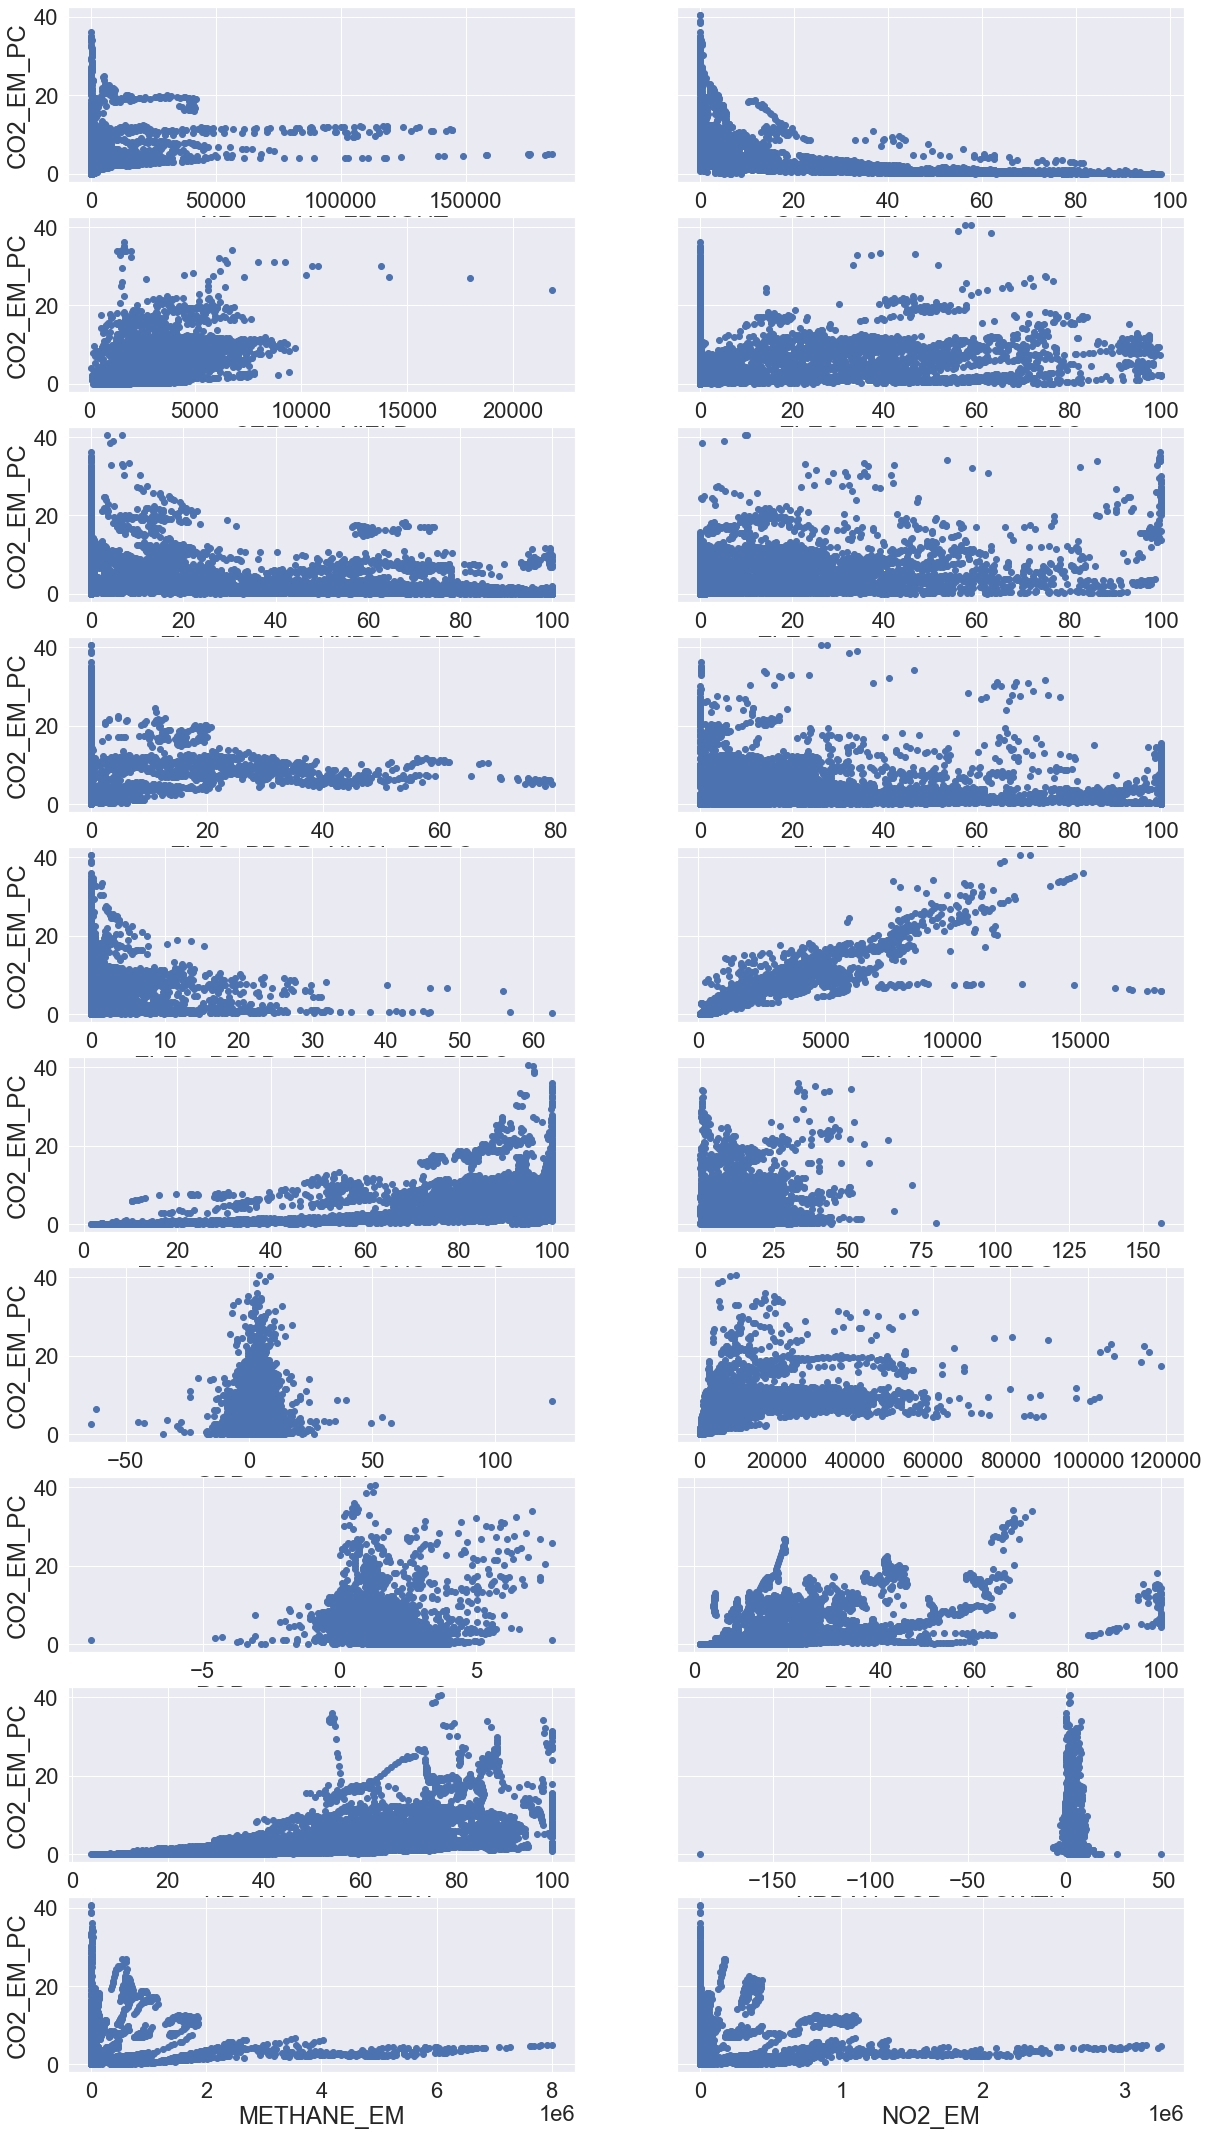

In [138]:
predictor_features = [
'AIR_TRANS_FREIGHT',
'COMB_REN_WASTE_PERC',
'CEREAL_YIELD',
'ELEC_PROD_COAL_PERC',
'ELEC_PROD_HYDRO_PERC',
'ELEC_PROD_NAT_GAS_PERC',
'ELEC_PROD_NUCL_PERC',
'ELEC_PROD_OIL_PERC',
'ELEC_PROD_RENW_SRC_PERC',
'EN_USE_PC',
'FOSSIL_FUEL_EN_CONS_PERC',
'FUEL_IMPORT_PERC',
'GDP_GROWTH_PERC',
'GDP_PC',
'POP_GROWTH_PERC',
'POP_URBAN_AGG',
'URBAN_POP_TOTAL',
'URBAN_POP_GROWTH',
'METHANE_EM',
'NO2_EM',]

# # Manually set the parameters of the figure to an appropriate size
plt.rcParams['figure.figsize'] = [20, 38]

# Call subplots specifying the desired grid structure
# The y axes should be shared
fig, axes = plt.subplots(nrows=10, ncols=2, sharey=True)

# Loop through the features that will be the predictors to build the plot
# Rearrange data into a 2D array of 8 rows and 3 columns
arr = np.array(predictor_features).reshape(10, 2)

# Use enumerate to loop over the 2D array of rows and columns
# Create scatter plots of each CO2_EM_PC vs each feature; CO2_EM_PC will be the dependent variable
for row, col_arr in enumerate(arr):  
    for col, feature in enumerate(col_arr):
        axes[row, col].scatter(data_filtered[feature], data_filtered['CO2_EM_PC'])
        if col == 0:
            axes[row, col].set(xlabel=feature, ylabel='CO2_EM_PC')
        else: 
            axes[row, col].set(xlabel=feature)
plt.show() 

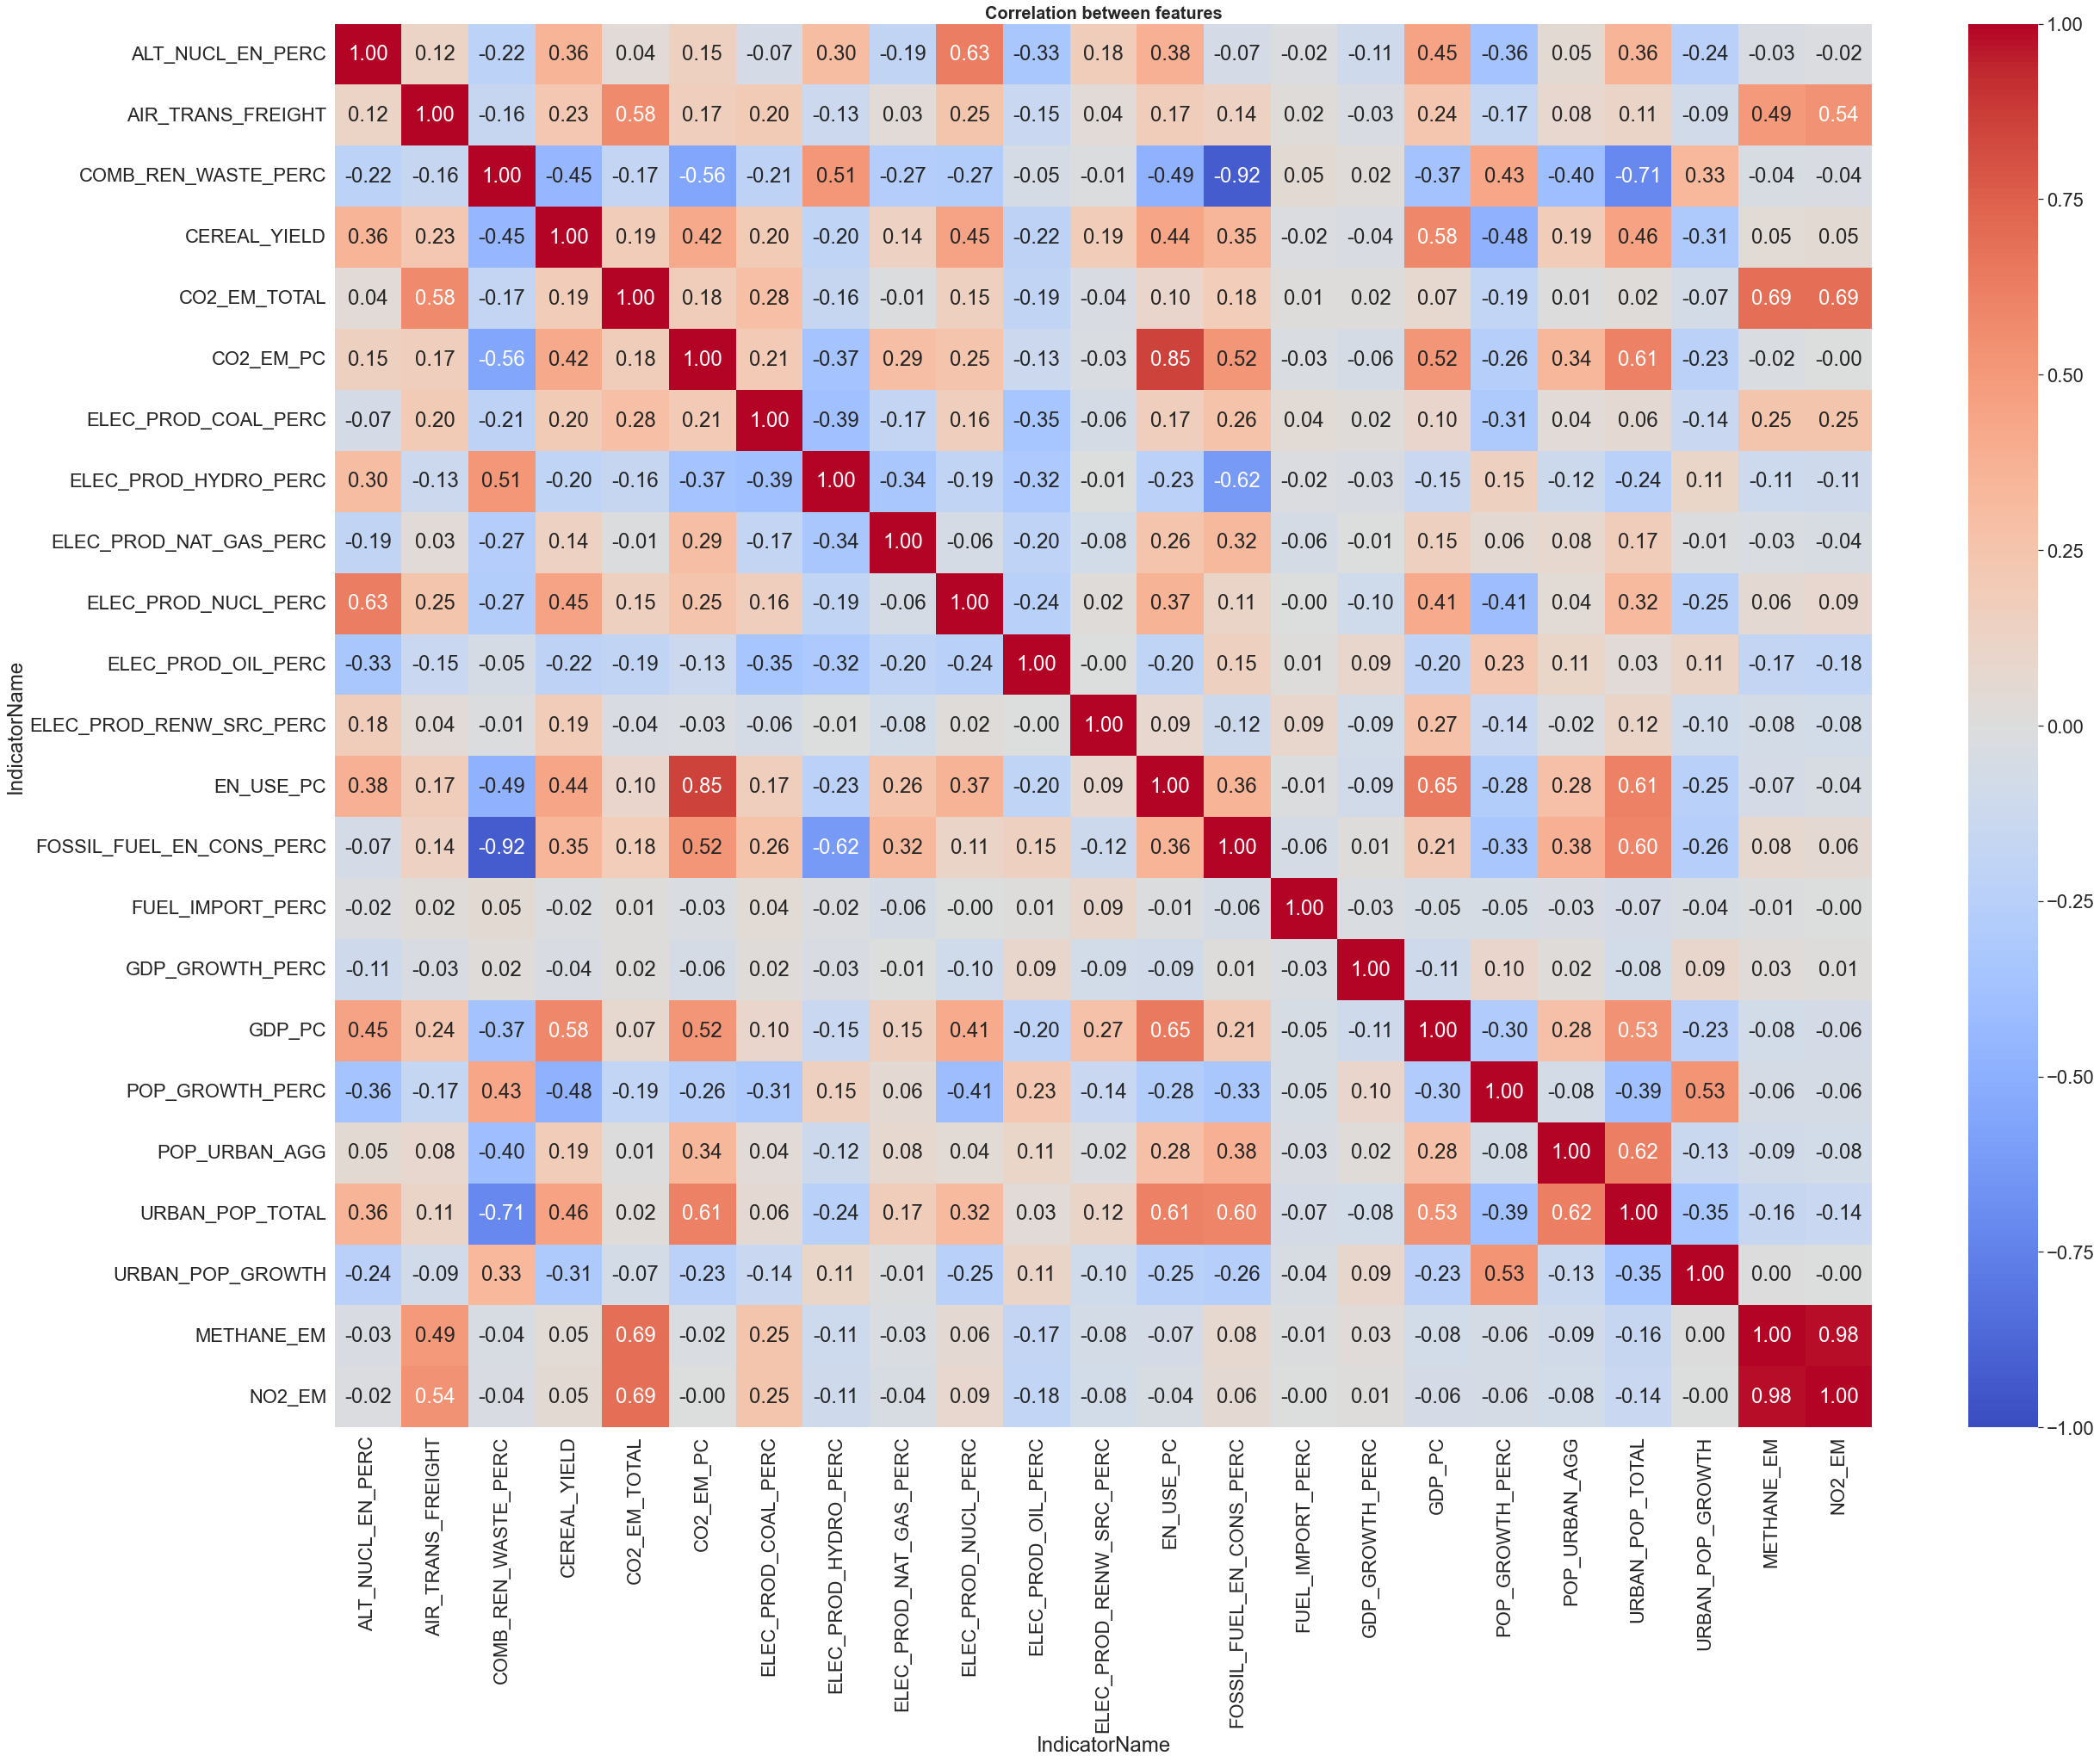

In [139]:
data_features = data_imputed[indicator_codes]

# plot a correlation of all features
# correlation matrix
sns.set(font_scale=2)
f,ax=plt.subplots(figsize=(40,30))
sns.heatmap(data_features.corr(), annot=True, cmap='coolwarm', fmt = ".2f", center=0, vmin=-1, vmax=1)
plt.title('Correlation between features', fontsize=20, weight='bold' )
plt.show()

sns.set(font_scale=1)

# Data Export

In [6]:
# Export the clean dataframe to a csv file
data_imputed.to_csv('../dataset/processed/data_preprocessed.csv', index=False)

NameError: name 'data_imputed' is not defined